In [141]:
import glob

csvfiles = glob.glob('*.csv')
csvfiles.sort()
csvfiles

['rummy.MindistOpp1 (Mindist + Opp).vs.mcts2-10 (MCTS-minscore).10.card.2.joker.csv',
 'rummy.MindistOpp1 (Mindist + Opp).vs.mcts2-25 (MCTS-minscore).10.card.2.joker.csv',
 'rummy.MindistOpp1 (Mindist + Opp).vs.mcts2-50 (MCTS-minscore).10.card.2.joker.csv',
 'rummy.mcts1-10 (MCTS-minscore).vs.MindistOpp2 (Mindist + Opp).10.card.2.joker.csv',
 'rummy.mcts1-25 (MCTS-minscore).vs.MindistOpp2 (Mindist + Opp).10.card.2.joker.csv',
 'rummy.mcts1-50 (MCTS-minscore).vs.MindistOpp2 (Mindist + Opp).10.card.2.joker.csv']

In [142]:
import pandas as pd
heatmap_dict = {}
for csv in csvfiles:
    result = pd.read_csv(csv)
    result.head()
    players = [csv.split('.')[i] for i in [1,3]]
    wins = result['winner'].value_counts().to_dict()
    median_gain = (result['score2']-result['score1']).median()
    mean_gain = (result['score2']-result['score1']).mean()
    print(f"{players[0]:<35} : {wins.get(0,0)*100/len(result):>5}% vs. {players[1]:<35} : {wins.get(1,0)*100/len(result):>5}%")
    if players[1] in heatmap_dict.keys():
        heatmap_dict[players[1]][players[0]] = (wins.get(0,0)*100/len(result),median_gain,mean_gain)
    else:
        heatmap_dict[players[1]]={players[0]:(wins.get(0,0)*100/len(result),median_gain,mean_gain)}

MindistOpp1 (Mindist + Opp)         :  78.9% vs. mcts2-10 (MCTS-minscore)            :  21.1%
MindistOpp1 (Mindist + Opp)         :  76.1% vs. mcts2-25 (MCTS-minscore)            :  23.9%
MindistOpp1 (Mindist + Opp)         :  75.3% vs. mcts2-50 (MCTS-minscore)            :  24.7%
mcts1-10 (MCTS-minscore)            :  26.2% vs. MindistOpp2 (Mindist + Opp)         :  73.8%
mcts1-25 (MCTS-minscore)            :  30.3% vs. MindistOpp2 (Mindist + Opp)         :  69.7%
mcts1-50 (MCTS-minscore)            :  31.4% vs. MindistOpp2 (Mindist + Opp)         :  68.6%


In [143]:
heatmap_dict

{'mcts2-10 (MCTS-minscore)': {'MindistOpp1 (Mindist + Opp)': (78.9,
   np.float64(18.0),
   np.float64(17.147))},
 'mcts2-25 (MCTS-minscore)': {'MindistOpp1 (Mindist + Opp)': (76.1,
   np.float64(16.0),
   np.float64(14.767))},
 'mcts2-50 (MCTS-minscore)': {'MindistOpp1 (Mindist + Opp)': (75.3,
   np.float64(16.0),
   np.float64(14.807))},
 'MindistOpp2 (Mindist + Opp)': {'mcts1-10 (MCTS-minscore)': (26.2,
   np.float64(-15.0),
   np.float64(-12.229)),
  'mcts1-25 (MCTS-minscore)': (30.3, np.float64(-13.0), np.float64(-8.9005)),
  'mcts1-50 (MCTS-minscore)': (31.4, np.float64(-11.0), np.float64(-7.791))}}

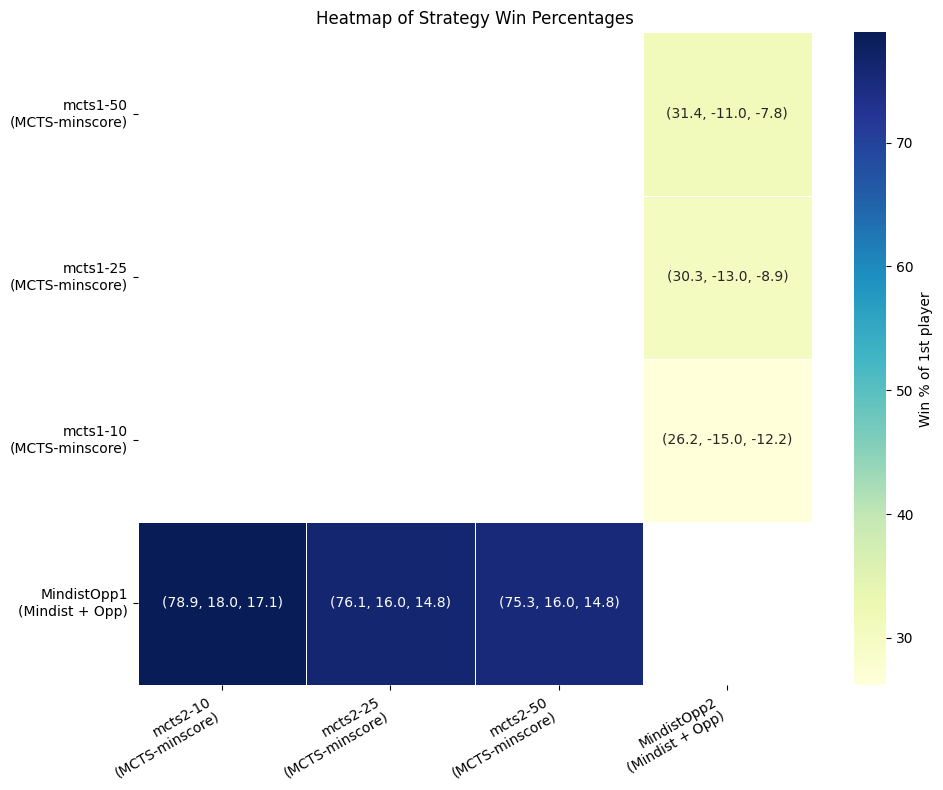

In [144]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Extract first values for color
heat_values = pd.DataFrame({col: {row: val[0] for row, val in rows.items()} for col, rows in heatmap_dict.items()})

# Extract full tuples for annotations
annotations = pd.DataFrame({col: {row: f"({val[0]:.1f}, {val[1]:.1f}, {val[2]:.1f})" for row, val in rows.items()} for col, rows in heatmap_dict.items()})

# Optional: wrap labels to prevent overlap
def wrap(label):
    return label.replace(" (", "\n(")

heat_values.index = [wrap(idx) for idx in heat_values.index]
heat_values.columns = [wrap(col) for col in heat_values.columns]
annotations.index = heat_values.index
annotations.columns = heat_values.columns
heat_values = heat_values.iloc[::-1]
annotations = annotations.iloc[::-1]

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(heat_values, annot=annotations, fmt="", cmap="YlGnBu", linewidths=0.5, cbar_kws={"label": "Win % of 1st player"})

plt.title("Heatmap of Strategy Win Percentages")
plt.xticks(rotation=30, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()